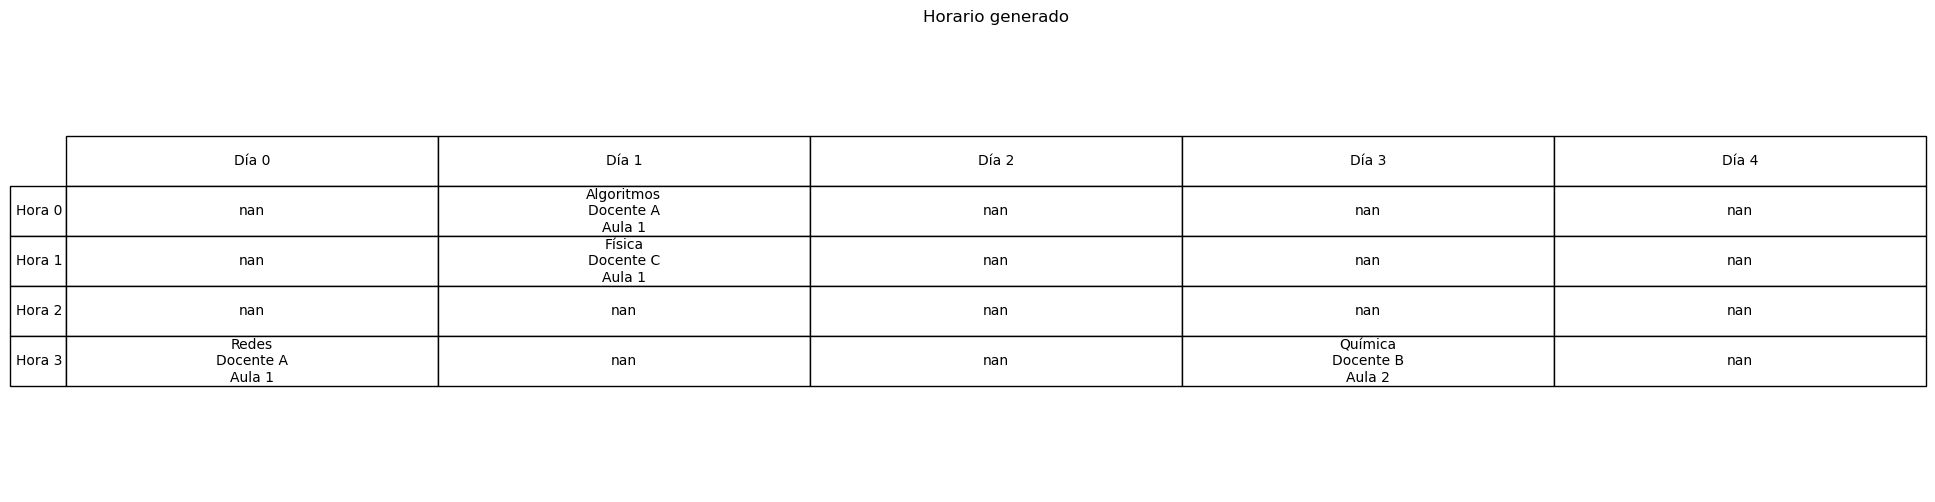

[('Matemática', 'Docente A', 'Aula 1', 'Día 3 Hora 3'),
 ('Física', 'Docente C', 'Aula 1', 'Día 1 Hora 1'),
 ('Química', 'Docente B', 'Aula 2', 'Día 3 Hora 3'),
 ('Algoritmos', 'Docente A', 'Aula 1', 'Día 1 Hora 0'),
 ('Redes', 'Docente A', 'Aula 1', 'Día 0 Hora 3')]

In [10]:
import random
import copy
import matplotlib.pyplot as plt
import pandas as pd

# Datos simulados
cursos = ['Matemática', 'Física', 'Química', 'Algoritmos', 'Redes']
docentes = ['Docente A', 'Docente B', 'Docente C']
aulas = ['Aula 1', 'Aula 2', 'Aula 3']
bloques = [(dia, hora) for dia in range(5) for hora in range(4)]  # 5 días × 4 horas

# Asignación = (curso, docente, aula, bloque)
def generar_horario_aleatorio():
    horario = []
    for curso in cursos:
        docente = random.choice(docentes)
        aula = random.choice(aulas)
        bloque = random.choice(bloques)
        horario.append((curso, docente, aula, bloque))
    return horario

def fitness(horario):
    penalidad = 0
    usados = {'bloque_docente': set(), 'bloque_aula': set()}
    
    for curso, docente, aula, bloque in horario:
        if (bloque, docente) in usados['bloque_docente']:
            penalidad += 10  # Solapamiento de docente
        else:
            usados['bloque_docente'].add((bloque, docente))
            
        if (bloque, aula) in usados['bloque_aula']:
            penalidad += 5  # Solapamiento de aula
        else:
            usados['bloque_aula'].add((bloque, aula))

    return penalidad

# Operadores genéticos
def crossover(p1, p2):
    punto = len(p1) // 2
    return p1[:punto] + p2[punto:]

def mutar(horario):
    i = random.randint(0, len(horario)-1)
    curso, _, _, _ = horario[i]
    nuevo = (curso, random.choice(docentes), random.choice(aulas), random.choice(bloques))
    horario[i] = nuevo
    return horario

# Búsqueda local Tabu
def tabu_search(horario, max_iter=10, tabu_size=5):
    mejor = copy.deepcopy(horario)
    actual = copy.deepcopy(horario)
    lista_tabu = []

    for _ in range(max_iter):
        vecinos = []
        for _ in range(5):
            vecino = copy.deepcopy(actual)
            mutar(vecino)
            if vecino not in lista_tabu:
                vecinos.append(vecino)

        if not vecinos:
            break

        mejor_vecino = min(vecinos, key=fitness)
        if fitness(mejor_vecino) < fitness(mejor):
            mejor = mejor_vecino

        lista_tabu.append(mejor_vecino)
        if len(lista_tabu) > tabu_size:
            lista_tabu.pop(0)
        actual = mejor_vecino

    return mejor

# Visualización
def visualizar_horario(horario):
    df = pd.DataFrame(index=[f"Hora {h}" for h in range(4)],
                      columns=[f"Día {d}" for d in range(5)])

    for curso, docente, aula, (dia, hora) in horario:
        texto = f"{curso}\n{docente}\n{aula}"
        df.loc[f"Hora {hora}", f"Día {dia}"] = texto

    plt.figure(figsize=(12, 6))
    plt.title("Horario generado")
    tabla = plt.table(cellText=df.values,
                      rowLabels=df.index,
                      colLabels=df.columns,
                      cellLoc='center',
                      loc='center')
    tabla.auto_set_font_size(False)
    tabla.set_fontsize(10)
    tabla.scale(2, 3)
    plt.axis('off')
    plt.show()

# Algoritmo híbrido GA + Tabu
def genetico_tabu():
    poblacion = [generar_horario_aleatorio() for _ in range(10)]

    for gen in range(30):
        poblacion = sorted(poblacion, key=fitness)
        nueva_poblacion = []

        for i in range(5):  # Selección de padres
            padre1 = poblacion[i]
            padre2 = random.choice(poblacion)
            hijo = crossover(padre1, padre2)
            mutar(hijo)
            hijo = tabu_search(hijo)  # Aplicamos mejora local
            nueva_poblacion.append(hijo)

        poblacion = nueva_poblacion

    mejor = min(poblacion, key=fitness)
    return mejor

# Ejecutar e integrar visualización
mejor_horario = genetico_tabu()
visualizar_horario(mejor_horario)
mejor_horario_texto = [(curso, docente, aula, f"Día {bloque[0]} Hora {bloque[1]}") for curso, docente, aula, bloque in mejor_horario]
mejor_horario_texto
